# Trabajo Semanal N°0 : 'Primeros Pasos en las Simulaciones'
### Alumno: Magdalena Guida

### APS - 2do cuatrimestre 2025


El objetivo de este trabajo es la programacion de una señal senoidal, que permita la posibilidad de parametrizar lo siguientes variables:

- Amplitud maxima de la senoidal $(Vmax) [Volts]$
- Valor medio $(dc) [Volts]$
- Frecuencia $(frec = ff) [Hz]$
- Fase $(ph) [rad]$
- Cantidad de muestras a digitalizar $(N)$
- Frecuencia de muestreo $(fs) [Hz]$

Se utlizaron distintos valores de frecuencias: {$1, 500, 999, 1001, 2001$} $Hz$


In [11]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

fs =1000     # Frecuencia de muestreo
N = 1000     # Número de muestras
ts = 1 / fs  # Tiempo de muestreo
df = fs / N  # Resolución espectral  
dc = 0       #Desplazamiento vertical [V]  
ph = 0       #FASE = Desplazamiento horizontal [rad]

In [12]:
#%%
# Definicion funciónes seno
def func_sen(Vmax=1, dc=dc, ff=1, ph=ph, nn=N, fs=fs):
    
    tt = np.arange(0, nn / fs, 1 / fs).reshape(nn,1)
    xx = Vmax * np.sin(2 * np.pi * ff * tt + ph).reshape(nn,1) + dc
    
    return tt, xx

tt1, xx1 = func_sen(ff=1, fs=fs)
tt2, xx2 = func_sen(ff=500, fs=fs)
tt3, xx3 = func_sen(ff=999, fs=fs)
tt4, xx4 = func_sen(ff=1001, fs=fs)
tt5, xx5 = func_sen(ff=2001, fs=fs)

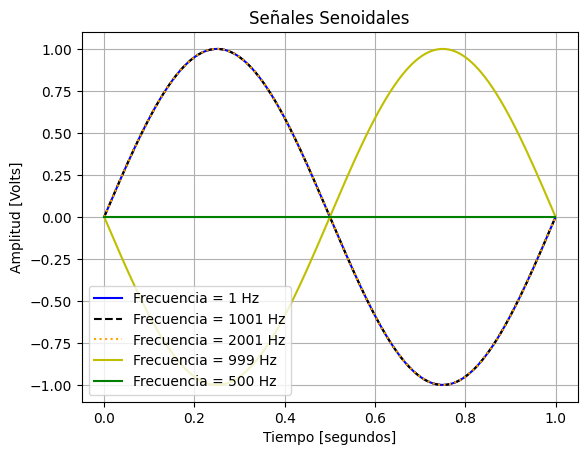

In [14]:
#%%
# GRAFICO 
# Caracteristicas del Grafico

plt.figure()
plt.title("Señales Senoidales")
plt.plot(tt1, xx1, label="Frecuencia = 1 Hz", color = 'b')
plt.plot(tt4, xx4, label="Frecuencia = 1001 Hz", color = 'black', linestyle = '--')
plt.plot(tt5, xx5, label="Frecuencia = 2001 Hz", color = 'orange', linestyle = 'dotted')
plt.plot(tt3, xx3, label="Frecuencia = 999 Hz", color = 'y')
plt.plot(tt2, xx2, label="Frecuencia = 500 Hz", color = 'g')

plt.legend(loc = 'lower left')
plt.xlabel("Tiempo [segundos]")
plt.ylabel("Amplitud [Volts]")
plt.grid(True)
plt.show()


Realizar un muestreo correcto requiere cumplir con el Teorema de Muestreo de Nyquist - Shannon, que pide $ff≤\frac{f_s}{2}$, la frecuencia de la señal debe ser mayor o igual a la mitad de la frecuencia de muestreo. Igualmente, para asegurar la calidad del muestreo a nivel practico, se pide $ff<<<\frac{f_s}{2}$.
Al no cumplir, se genera el fenomeno de Aliasing, que significa que las frecuencias altas se 'disfrazan' de señales de frecuencias mas bajas, causando muchisima perdida de informacion. Esta es la razon, por la que podemos ver a las señales de ff: {$1, 1001, 2001$} $Hz$, representada como la misma señal, que corresponde a  una frecuencias de $1$ $Hz$, cuando en realidad esperariamos ver mas repeticiones de la senoidal. Para determinar, de que manera se distorcionan las señales, existe una frecuencia de Alias, que se define como:  $f_{alias} =  ff - k*fs $, donde $k$ representa al numero entero mas cercano a la division entre $\frac{ff}{f_s}$. 
Los ultimos casos analizados, que se sabe que no cumplen con el Teorema de Muestreo: 
- $ K = \frac{1000Hz}{1001Hz} = 0.999$  $-> K = 1 $, tal que $f_{alias} =  1001Hz - 1*1000Hz  = 1Hz$
- $ K = \frac{1000Hz}{2001Hz} = 0.499$  $-> K = 1 $, tal que $f_{alias} = 2001Hz - 1*1000Hz   = 1001Hz$ , el proceso se repite y resulta en $f_{alias} = 1Hz$

Si se aplica el mismo concepto a la señal con frecuencia de $999Hz$, que tampoco cumple con el Teorema: 
- $ K = \frac{1000Hz}{999Hz} = 1.001$  $-> K = 1 $, tal que $f_{alias} =  999Hz - 1*1000Hz  = -1Hz$, y observamos en el grafico, una señal de frecuencia de $1Hz$, pero invertida por el signo menos de $f_{alias}$

Por ultimo, la frecuencia de $500Hz$, al aplicar el teorema, $500Hz ≤\frac{1000Hz}{2}$ $-> 500Hz = 500Hz$, comprobamos que cumple con lo requerido, pero como se especifico anteriormente, esto no es suficiente para recrear la señal de manera respresentativa a la original. Una frecuencia de muestreo exactamente 2 veces mayor a la frecuencia de la señal, lograra obtener dos puntos sobre el comienzo y final de la señal, por eso la representa como una recta. 


Se experimento con distintas formas de señales, tales como la 'square' y 'sawtooth'. Para graficarlas se las programo siguiendo los parametros definidos para la senoidal. En el caso de la cuadrada, se agrego el parametro $duty$, que significa el porcentaje representado entre $[0 ; 1]$ de ancho que tendra el cuadrado que existe por arriba del eje x (el cuadrado 'positivo'). En este caso se define $duty = 0.5$ para tener una funcion simetrica. La señal triangular se programo desde la funcion 'sawtooth', que con el parametro $width existente entre [0;1]$ se define a que distancia del punto mas bajo estara el proximo punto alto, se lo define $width = 0.5$ para obtener la forma caracteristica de señal triangular. Se las definio a ambas con una frecuenia de $3Hz$.

In [27]:
def func_square(Vmax=1, dc=dc, ph=ph, nn=N, fs=fs, ff=1, duty= 1/2):
    tta = np.arange(0, nn/fs, 1/fs).reshape(nn, 1)
    xxa = Vmax * signal.square(2 * np.pi * tta * ff + ph, duty=duty ).reshape(nn, 1) + dc
    
    return tta, xxa

def func_triang(Vmax=1, dc=dc, ph=ph, nn=N, ff=1, fs=fs, width=1/2):
    ttb = np.arange(0, nn/fs, 1/fs).reshape(nn, 1)
    xxb = Vmax * signal.sawtooth(2 * np.pi * ff * ttb + ph, width =width).reshape(nn, 1) + dc
   
    return ttb, xxb

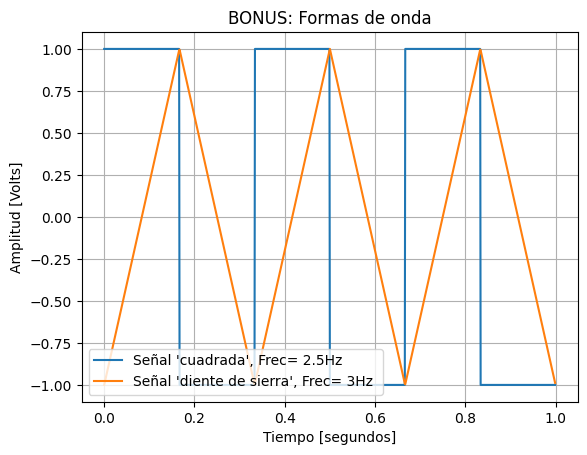

In [29]:
tta1, xxa1 = func_square (ff=3)    # 3 periodos enteros de la cuadrada
ttb1, xxb1 =func_triang(ff=3)

plt.figure()
plt.title("BONUS: Formas de onda")
plt.plot(tta1, xxa1, label="Señal 'cuadrada', Frec= 2.5Hz")
plt.plot(ttb1, xxb1, label="Señal 'diente de sierra', Frec= 3Hz ")
plt.legend(loc = 'lower left')
plt.xlabel("Tiempo [segundos]")
plt.ylabel("Amplitud [Volts]")
plt.grid(True)
plt.show()

Se concluye entonces, acerca de la relacion entre frecuencia de muestreo $fs$ y  frecuencia de señal $ff$, clasificada en los siguientes rangos: 
- *Cumple Nyquist* = $ff$ MENOR a $\frac{f_s}{2}$ --> La señal se muestreara correctamente.
- $ff = \frac{f_s}{2}$ --> Constante con el valor de DC. Tambien sucedera lo MISMO para valores de $ff = \frac{f_s}{2} + m*ff$, siendo m un numero entero.
- *NO cumple Nyquist* = $ff$ MAYOR a $\frac{f_s}{2}$--> Se muestrearan con su frecuencia $f_{alias}$.
- $ ff = f_s$ --> **NO** se muestreara. Tambien sucedera para valores de $ff = ff + m*ff$, siendo m un numero entero. 